# Linear algebra overview

This notebook introduces concepts form linear algebra in a birds-eye overview. The goal is not to get into the details, but to give the reader a taste of the different types of thinking: computational, geometrical, and theoretical, that are used in linear algebra.

## Plan

  - Prerequisites
  - Vectors
    - Definition 
    - Geomterical interpretation
    - Dot product
      - Definition
      - Intuition
      - Unit length vectors
  - Projections
    - Projection operation
    - Example: projection onto the line with equation $x-y=0$
  - Linear transformation are vector functions
    - Linear property: $f(a\mathbf{x} + b\mathbf{y}) = af(\mathbf{x}) + bf(\mathbf{y})$
    - Projection transformation P
  - Matrix representation of linear transformations
    - Linear transformation <--> Matrix-vector product equivalence
    - Show matrix representation M_P of Projection transformation P
  - Matrices
    - Definition 
    - Matrix operations
      - Matrix-vector product 
      - Matrix-matrix product
      - Trace
      - Determinant
      - Matrix inverse
      - Matrix equations
    - Reduced row echelon form 
  - Linear transformations
    - Fundamental spaces
      - Vector spaces
    - Matrix representations
    - Eigenvectors and eigenvalues
    - Invertible matrix theorem
  - Further topics
    - Analytical geometry
      - Points, lines, and planes
      - Projections
      - Distances
    - Abstract vector spaces
      - Vector space of polynomials, e.g. $p(x)=a_0 + a_1x + a_2x^2$
    - Special types of matrices
    - Matrix decompositions
    - Linear algebra over other fields

In [4]:
# setup SymPy
from sympy import *
x, y, z, t = symbols('x y z t')
init_printing()

# a vector is a special type of matrix  (an n-vector is either a nx1 or a 1xn matrix)
Vector = Matrix   # define alias Vector so I don't have to explain this during video

# setup plotting
# %matplotlib notebook    # useful for 3D plots
%matplotlib inline
import matplotlib.pyplot as mpl
from plot_helpers import plot_vec, plot_vecs, plot_line, plot_plane, autoscale_arrows

# Prerequisites

Linear algebra builds upon high school math concepts like:
  - Numbers (integers, rationals, reals, complex numbers)
  - Functions ($f(x)$ takes an input $x$ and produces an output $y$)
  - Geometry (lines, curves, areas, triangles)

# Vectors

In [5]:
# define two vectors
u = Vector([1,1])
v = Vector([1,-1])
u

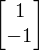

In [6]:
v

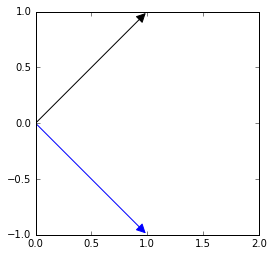

In [7]:
fig = mpl.figure()
plot_vecs(u,v)
autoscale_arrows()

### Vector addition

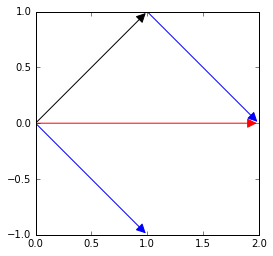

In [8]:
# graphical
fig = mpl.figure()
plot_vecs(u,v)
plot_vec(v, at=u, color='b')
plot_vec(u+v, color='r')
autoscale_arrows()

# algebraic
u+v

### Vector length $\|\vec{u}\|$

In [9]:
u.norm()

### Unit-length vectors $\hat{u}$

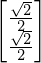

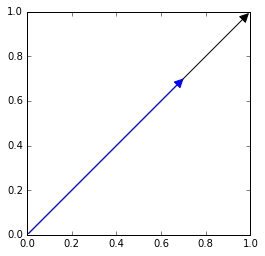

In [10]:
uhat = u/u.norm()

fig = mpl.figure()
plot_vecs(u,uhat)

uhat

## Dot product

### Definition

The dot product of two vectors is proporional to the lengths for which the two vectors extend in the same direction.

If $\vec{u}=(u_1,u_2)$ and $\vec{v}=(v_1,v_2)$, then:
$$
  \vec{u} \cdot \vec{v} = u_1v_1 + u_2v_2 = \|\vec{u}\| \|\vec{v}\| \cos \theta_{uv},
$$
where $\theta_{uv}$ is the angle between the vectors.

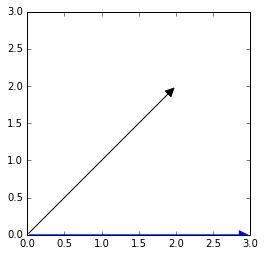

In [13]:
u = Vector([2,2])
v = Vector([3,0])

fig = mpl.figure()
plot_vecs(u,v)
autoscale_arrows()

u.dot(v)

### Intuition

True

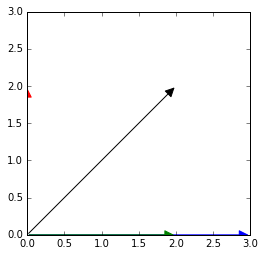

In [19]:
# split the vector u into two parts:
u_parallel_to_v = Vector([2,0])
u_perp_to_v = Vector([0,2])

fig = mpl.figure()
plot_vecs(u,v, u_parallel_to_v, u_perp_to_v)
autoscale_arrows()

u == u_parallel_to_v + u_perp_to_v

In [17]:
# the dot product uses only the part of u that is parallel to v
u.dot(v) == u_parallel_to_v.dot(v) == u_parallel_to_v.norm()*v.norm()

True

In [20]:
# two vetors that are perpendicular, have zero dot product together
u_perp_to_v.dot(v)

In [24]:
# the cosine factor in the geometric formula computes the "parallel to v" component 
u_parallel_to_v.norm() == u.norm()*cos(45*pi/180)

True

# Projections

A projection of the vector $\vec{v}$ in the direction $\vec{d}$ is denoted $\Pi_{\vec{d}}(\vec{v})$. The formula for computing the projections uses the dot product operation:
$$
   \Pi_{\vec{d}}(\vec{v})  
      \ \equiv \ 
      (\vec{v} \cdot \hat{d}) \hat{d}
      \ =  \ 
      \left(\vec{v} \cdot \frac{\vec{d}}{\|\vec{d}\|} \right) \frac{\vec{d}}{\|\vec{d}\|}.
$$

## Projection operation

In [27]:
def proj(v, d):
    """Computes the projection of vector `v` onto direction `d`."""
    return v.dot( d/d.norm() )*( d/d.norm() )

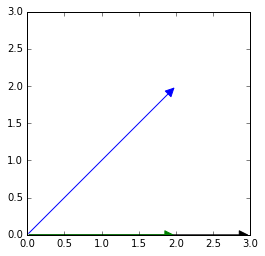

In [34]:
v = Vector([2,2])
d = Vector([3,0])
proj_v_on_d = proj(v,d)

fig = mpl.figure()
plot_vecs(d,v,proj_v_on_d)
autoscale_arrows()

Projections play an important role in physics. For example, when solving a two dimensional projectile problem we often decompose vector quantities like forces $\vec{F}$, velocities $\vec{v}$, and momenta $\vec{p}$ into their $x$- and $y$-components: $(F_x,F_y)$, $(v_x,v_y)$, and $(p_x,p_y)$. This decomposition of vectors can transform a complicated two-dimensional problem into two simpler one-dimensaional problems, which can be solved independetly.

## Example: projection onto the line with equation $y=x$

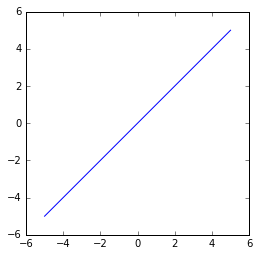

In [47]:
# The line with equation y = x can also be written as a paramteric equation 
# [x,y] = [0,0] + s*[1,1] where d = [1,1] is called the direction vector the line
d = Vector([1,1])

plot_line(d,[0,0])

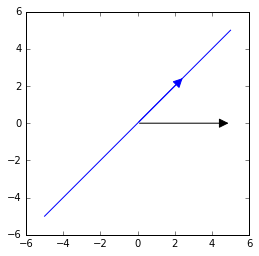

In [55]:
# want a function that computes the projection onto the line with equation y = x for any vec
def proj_d(vec):
    """Computes the projection of `vec` on line y=x."""
    return proj(vec, d)

v = Vector([5,0])

plot_line(d,[0,0])
plot_vecs(v, proj_line(v))

# Vector functions

Observe that the function `proj_d` is a *vector function*—a function that takes vectors as inputs and produces vectors as outputs. In mathematical notation we write this as
$$
  P : \mathbb{R}^2 \to \mathbb{R}^2.
$$

*Linear transformation* are vector functions that obey the linear property.
$$
  f(a\mathbf{x} + b\mathbf{y}) = af(\mathbf{x}) + bf(\mathbf{y})
$$

## Linear property: 

## Projection transformation P

# Matrix representation of linear transformations

## Linear transformation <--> Matrix-vector product equivalence

## Show matrix representation M_P of Projection transformation P

# Matrices

## Definition 

## Matrix operations

### Matrix-vector product 

### Matrix-matrix product

### Trace

### Determinant

### Matrix inverse

### Matrix equations

## Reduced row echelon form 

# Linear transformations

## Fundamental spaces

### Vector spaces

## Matrix representations

## Eigenvectors and eigenvalues

## Invertible matrix theorem

# Further topics

## Analytical geometry

### Points, lines, and planes

### Projections

### Distances

## Abstract vector spaces

### Vector space of polynomials, e.g. $p(x)=a_0 + a_1x + a_2x^2$

## Special types of matrices

## Matrix decompositions

## Linear algebra over other fields 

In [2]:
a = 3
a

3